In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("AusApparalSales4thQrt2020.csv")

In [7]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


# 1. Data wrangling 

#### Ensure that the data is clean and free from any missing or incorrect entries

In [13]:
na_values = df.isna().sum()

In [15]:
na_values

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

#### Choose a suitable data wrangling technique—either data standardization or normalization.

In [20]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


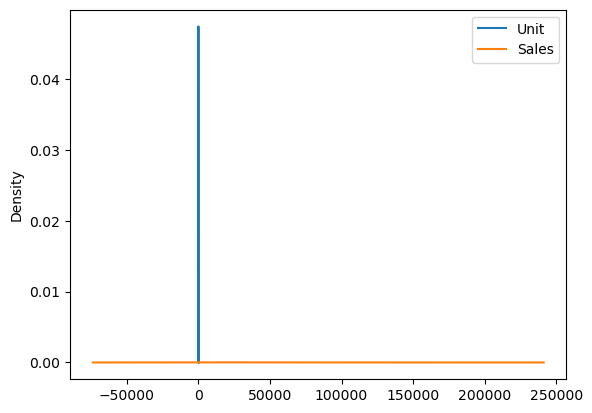

In [22]:
df[['Unit','Sales']].plot.kde()
plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler

In [28]:
ss = StandardScaler()

In [30]:
newdf=df[['Unit','Sales']]

In [32]:
data_transformed = ss.fit_transform(newdf)

In [34]:
type(data_transformed)

numpy.ndarray

In [36]:
newdf = pd.DataFrame(data_transformed,columns = ['Unit','Sales'])

In [38]:
newdf

,Unit,Sales
0,-0.775581,-0.775581
1,-0.775581,-0.775581
2,-1.085645,-1.085645
3,-0.232969,-0.232969
4,-1.163162,-1.163162
...,...,...
7555,-0.310485,-0.310485
7556,-0.232969,-0.232969
7557,-0.232969,-0.232969
7558,-0.543033,-0.543033


<Axes: ylabel='Density'>

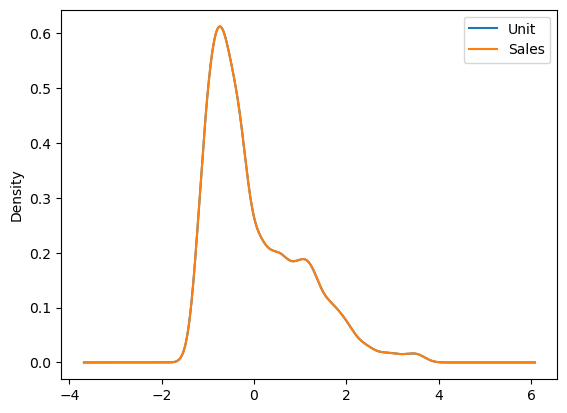

In [40]:
newdf.plot.kde()

C:\Users\lavan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

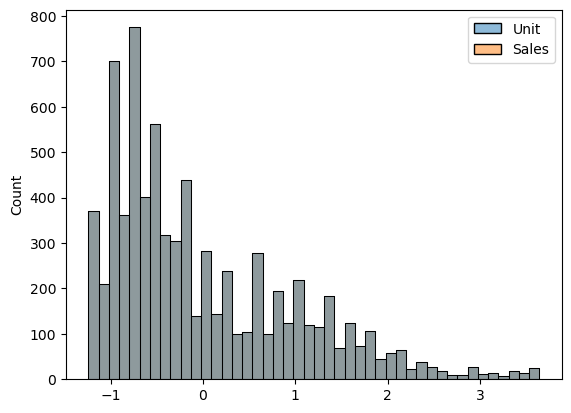

In [42]:
sns.histplot(data=newdf)

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
mm =MinMaxScaler()

In [48]:
normdf = mm.fit_transform(newdf)

In [50]:
testdf = pd.DataFrame(normdf,columns=newdf.columns)

In [52]:
testdf

,Unit,Sales
0,0.095238,0.095238
1,0.095238,0.095238
2,0.031746,0.031746
3,0.206349,0.206349
4,0.015873,0.015873
...,...,...
7555,0.190476,0.190476
7556,0.206349,0.206349
7557,0.206349,0.206349
7558,0.142857,0.142857


<Axes: ylabel='Density'>

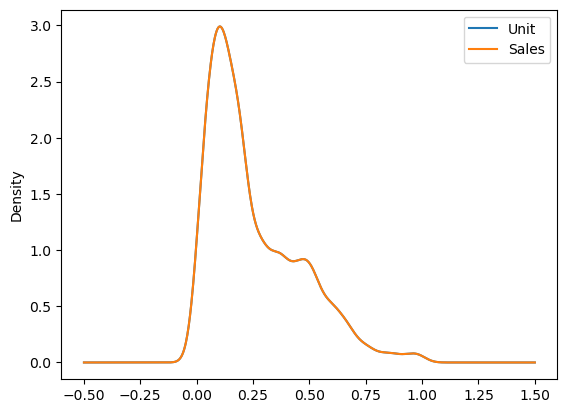

In [54]:
testdf.plot.kde()

### Use of the groupby() function 

In [59]:
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500


In [61]:
grouped = df.groupby(['State', 'Group']).sum()
grouped

Date  \
State Group                                                         
 NSW   Kids     1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Men      1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Seniors  1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Women    1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
 NT    Kids     1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Men      1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Seniors  1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Women    1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
 QLD   Kids     1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Men      1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Seniors  1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Women    1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
 SA    Kids     1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Men      1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Seniors  1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Women    1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
 TAS   Kids     1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Men      1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Seniors  1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Women    1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
 VIC   Kids     1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Men      1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Seniors  1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Women    1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
 WA    Kids     1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Men      1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Seniors  1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
       Women    1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   

                                                             Time   Unit  \
State Group                                                                
 NSW   Kids      Morning Afternoon Evening Morning Afternoon E...   7435   
       Men       Morning Afternoon Evening Morning Afternoon E...   7609   
       Seniors   Morning Afternoon Evening Morning Afternoon E...   7275   
       Women     Morning Afternoon Evening Morning Afternoon E...   7669   
 NT    Kids      Morning Afternoon Evening Morning Afternoon E...   2280   
       Men       Morning Afternoon Evening Morning Afternoon E...   2305   
       Seniors   Morning Afternoon Evening Morning Afternoon E...   2186   
       Women     Morning Afternoon Evening Morning Afternoon E...   2261   
 QLD   Kids      Morning Afternoon Evening Morning Afternoon E...   3404   
       Men       Morning Afternoon Evening Morning Afternoon E...   3357   
       Seniors   Morning Afternoon Evening Morning Afternoon E...   3276   
       Women     Morning Afternoon Evening Morning Afternoon E...   3330   
 SA    Kids      Morning Afternoon Evening Morning Afternoon E...   5806   
       Men       Morning Afternoon Evening Morning Afternoon E...   5862   
       Seniors   Morning Afternoon Evening Morning Afternoon E...   5887   
       Women     Morning Afternoon Evening Morning Afternoon E...   5988   
 TAS   Kids      Morning Afternoon Evening Morning Afternoon E...   2310   
       Men       Morning Afternoon Evening Morning Afternoon E...   2303   
       Seniors   Morning Afternoon Evening Morning Afternoon E...   2260   
       Women     Morning Afternoon Evening Morning Afternoon E...   2231   
 VIC   Kids      Morning Afternoon Evening Morning Afternoon E...  10544   
       Men       Morning Afternoon Evening Morning Afternoon E...  10563   
       Seniors   Morning Afternoon Evening Morning Afternoon E...  10526   
       Women     Morning Afternoon Evening Morning Afternoon E...  10593   
 WA    Kids   

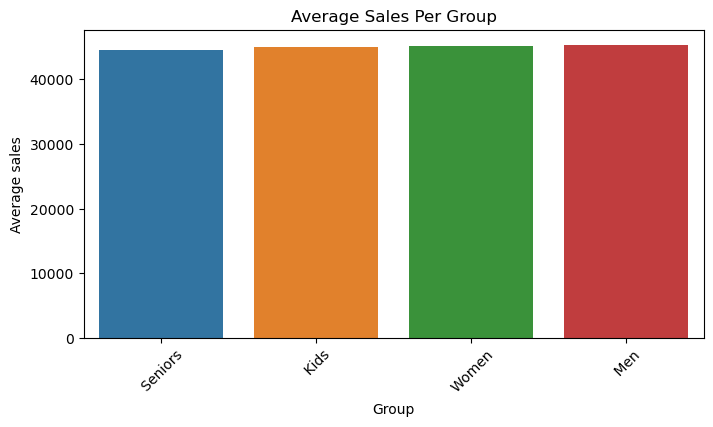

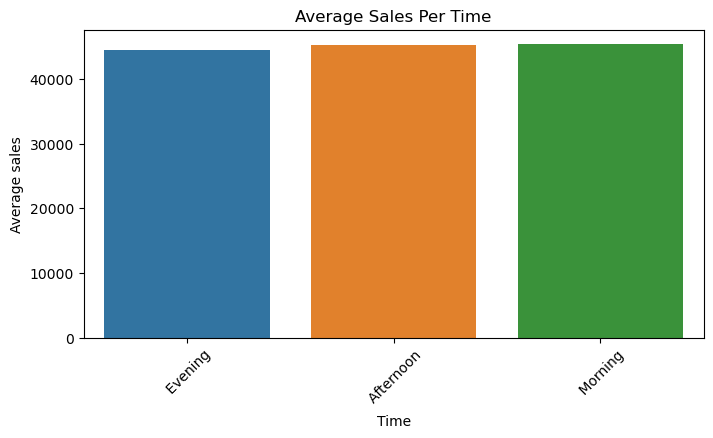

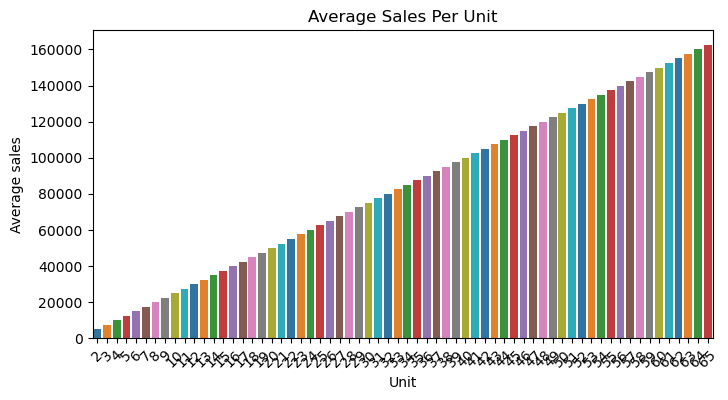

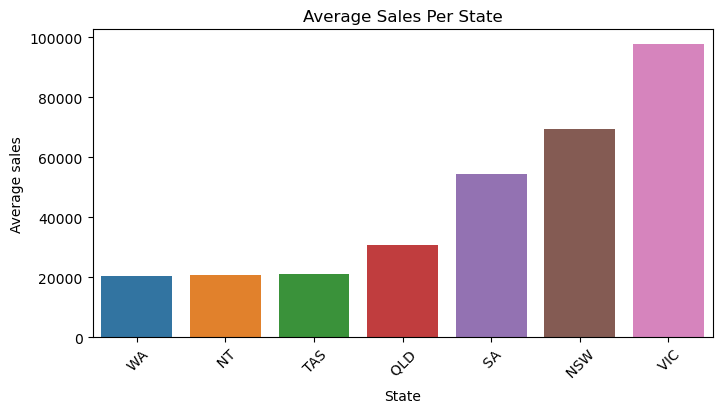

In [66]:
values = ['Group','Time','Unit','State']
for col in values:
    group = df.groupby(col)["Sales"].mean().sort_values()
    plt.figure(figsize=(8, 4))
    sns.barplot(x= group.index, y= group.values, palette='tab10')
    plt.xticks(rotation=45)
    plt.title(f'Average Sales Per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Average sales')
    plt.show()


##### From here using groupby function we can clearly see that WA NT TAS states have a high potential where we can increase our sales

# 2. Data analysis 

#### Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis. 

In [70]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [72]:
df[['Sales', 'Unit']].median()

Sales    35000.0
Unit        14.0
dtype: float64

In [74]:
df[['Sales', 'Unit']].mode()

,Sales,Unit
0,22500,9


#### Identify the group with the highest sales and the group with the lowest sales based on the data provided. 

In [77]:
grouped_sales = df.groupby('Group')['Sales'].sum()

In [79]:
grouped_sales 

Group
 Kids       85072500
 Men        85750000
 Seniors    84037500
 Women      85442500
Name: Sales, dtype: int64

In [81]:
group_highest_sales = grouped_sales.idxmax()
highest_sales = grouped_sales.max() 
group_lowest_sales = grouped_sales.idxmin()
lowest_sales = grouped_sales.min()

In [83]:
print(f"Group with highest sales: {group_highest_sales}  ({highest_sales})")
print(f"Group with lowest sales: {group_lowest_sales} ({lowest_sales})")

Group with highest sales:  Men  (85750000)
Group with lowest sales:  Seniors (84037500)


#### Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted. 

## Weekly Analysis

In [89]:
df['Date'] = pd.to_datetime(df['Date'])
# Resample changes the frequency of the time series data
# 'W-SUN' means we are resampling to weekly data with the week ending on Sunday
weekly_report = df.resample('W-SUN', on='Date').sum() 
weekly_report

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-04,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,6018,15045000
2020-10-11,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,10801,27002500
2020-10-18,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,10656,26640000
2020-10-25,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,10726,26815000
2020-11-01,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,8723,21807500
2020-11-08,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,8346,20865000
2020-11-15,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,8469,21172500
2020-11-22,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,8445,21112500
2020-11-29,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,8591,21477500


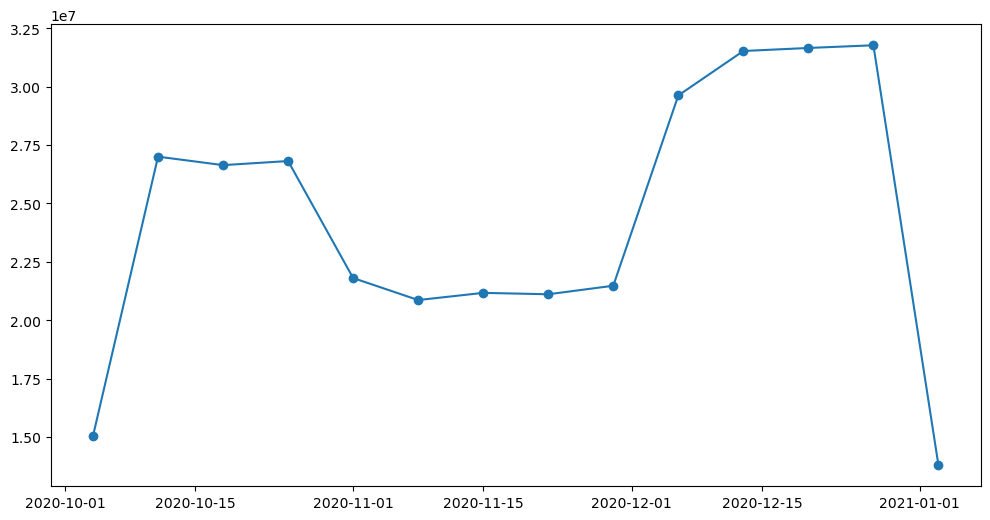

In [95]:
weekly_sales = df.resample('W-SUN', on='Date').sum()
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales['Sales'], marker='o', linestyle='-')
plt.show()

In [93]:
week_highest_sales = weekly_sales['Sales'].idxmax()
highest_week_sales = weekly_sales.loc[week_highest_sales, 'Sales']

print(f"Week with highest sales: {week_highest_sales}, Sales: {highest_week_sales}")

Week with highest sales: 2020-12-27 00:00:00, Sales: 31770000


## Monthly Analysis

In [99]:
monthly_report = df.resample('M', on='Date').sum()
monthly_report

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-31,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,45716,114290000
2020-11-30,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,36273,90682500
2020-12-31,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,54132,135330000


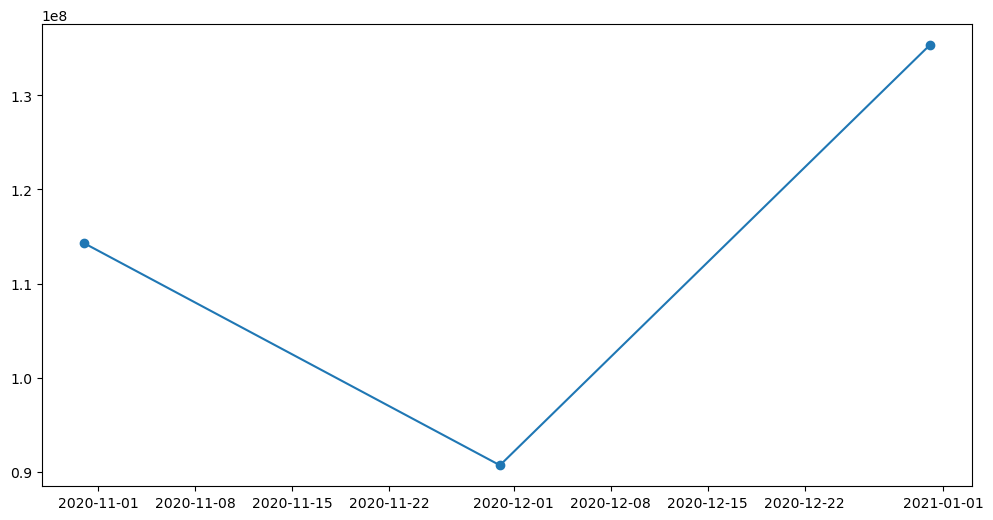

In [101]:
monthly_sales = df.resample('M', on='Date').sum()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['Sales'], marker='o', linestyle='-')
plt.show()

In [103]:
month_highest_sales = monthly_sales['Sales'].idxmax()
highest_month_sales = monthly_sales.loc[month_highest_sales, 'Sales']
print(f"Month with highest sales: {month_highest_sales.strftime('%B %Y')}, Sales: {highest_month_sales}")
#'%B': Full month name (e.g., January, February, March).
#'%Y': Four-digit year (e.g., 2020, 2021).

Month with highest sales: December 2020, Sales: 135330000


## Quarterly Analysis

In [106]:
quarterly_report = df.resample('Q', on='Date').sum()
quarterly_report

,Time,State,Group,Unit,Sales
Date,,,,,
2020-12-31,Morning Morning Morning Morning Afternoon Aft...,WA WA WA WA WA WA WA WA WA WA WA WA NT NT NT ...,Kids Men Women Seniors Kids Men Women Seniors...,136121,340302500


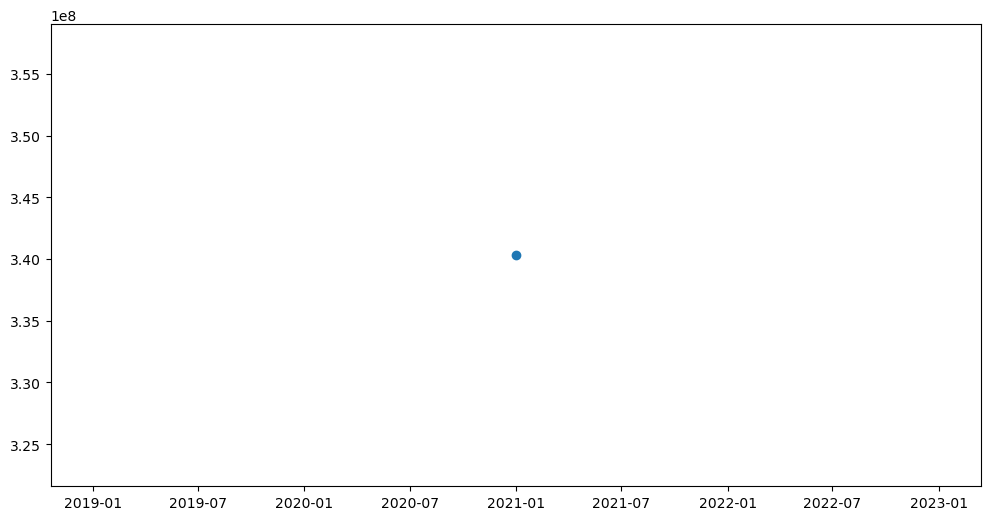

In [108]:
plt.figure(figsize=(12, 6))
plt.plot(quarterly_report.index, quarterly_report['Sales'], marker='o', linestyle='-')
plt.show()

# 3. Data visualization

#### State-wise sales analysis for different demographic groups (kids, women, men, and seniors).

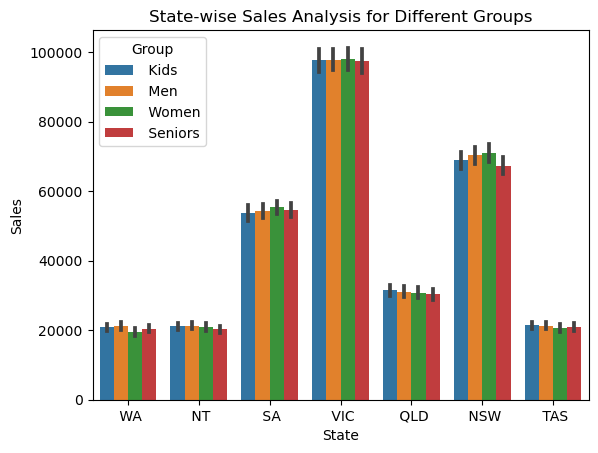

In [114]:
sns.barplot(data=df, x='State', y='Sales', hue='Group')
plt.title('State-wise Sales Analysis for Different Groups')
plt.show()

#### Time-of-the-day analysis: Identify peak and off-peak sales periods

### Peak Days

In [120]:
daily_sales = df.groupby('Date')['Sales'].sum().reset_index()
top_10_days = daily_sales.nlargest(10, 'Sales')
top_10_days

,Date,Sales
73,2020-12-14,4765000
69,2020-12-10,4717500
85,2020-12-26,4715000
74,2020-12-15,4657500
68,2020-12-09,4655000
86,2020-12-27,4637500
81,2020-12-22,4635000
88,2020-12-29,4607500
72,2020-12-13,4605000
87,2020-12-28,4595000


### Peak Off days

In [123]:
bottom_10_days = daily_sales.nsmallest(10, 'Sales')
bottom_10_days

,Date,Sales
31,2020-11-02,2725000
35,2020-11-06,2835000
51,2020-11-22,2867500
40,2020-11-11,2872500
32,2020-11-03,2877500
47,2020-11-18,2877500
48,2020-11-19,2905000
38,2020-11-09,2925000
56,2020-11-27,2982500
39,2020-11-10,2992500


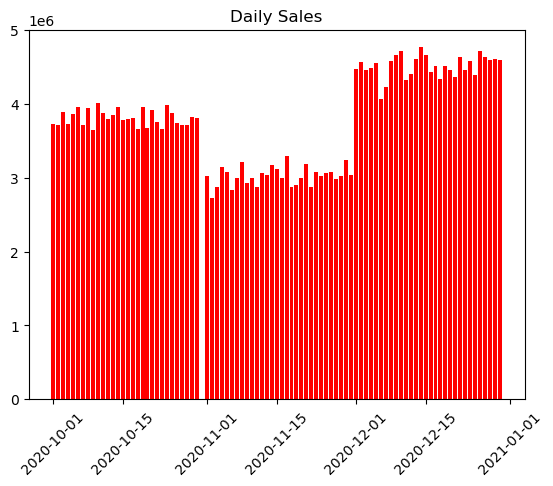

In [125]:
plt.bar(daily_sales['Date'], daily_sales['Sales'], color='red')
plt.xticks(rotation=45)
plt.title('Daily Sales')
plt.show()

#### We observe that all top 10 peak sales days are in December, while all bottom 10 sales days are in November. There is a notable difference in total sales between these two months, suggesting an opportunity to enhance sales growth in November.

##### (All charts that is daily, weekly, monthly, and quarterly have been included)

##### (I opted to use matplotlib.pyplot (plt) over seaborn (sns) for basic bar chart tasks, based on personal preference.)

## 4. Report generation  

#### "I've completed a comprehensive report above using the provided data, performing all required tasks to the best of my abilities"